In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import tqdm
# import os
# import seaborn as sns
# import statsmodels
# from scipy.stats import shapiro
# from statsmodels.stats.anova import AnovaRM
# from scipy.stats import ttest_rel
# from statsmodels.stats.multitest import multipletests
# import itertools

colorDic = {'blue' : '#6599FF', 'yellow' :'#FFAD33', 'green' : '#198D6D',  'purple': '#683B96', 'red' : '#FF523F', 'orange': '#F97306', 'cyan': '#00FFFF', 'pink': '#FF81C0', 'lime': '#AAFF32', 'brown': '#653700'}
colors = list(colorDic.values())

In [9]:
df = pd.read_csv(all_files[0], index_col=None, header=0, names=['startPause', 
    'activeScene', 'textFile', 'speed', 'phase', 'pupilDilation_L', 
    'pupilDilation_R', 'gazePosition_X',  'gazePosition_Y',  'gazePosition_Z']

SyntaxError: incomplete input (75847877.py, line 3)

In [10]:
df

NameError: name 'df' is not defined

In [33]:
li = []
path = 'Data/Main-Study_1'
# all_files = glob.glob(os.path.join(path , "/*.csv"))

all_files = glob.glob(path + '/*.csv')
ids = np.arange(len(all_files))

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, names=['startPause', 
    'activeScene', 'textFile', 'speed', 'phase', 'pupilDilation_L', 
    'pupilDilation_R', 'gazePosition_X',  'gazePosition_Y',  'gazePosition_Z'])
    li.append(df)

frame = pd.concat(li, keys=ids, axis=0).reset_index()

frame = frame.rename(columns = {'level_0':'pid', 'level_1':'pid_sample'})

In [34]:
frame

,pid,pid_sample,startPause,activeScene,textFile,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
0,0,0,15,NormalReading,NormalReading,0,calibration,0.000000,0.000000,(0.00,0.00,0.00)
1,0,1,15,NormalReading,NormalReading,0,calibration,6.007919,5.602066,(0.00,0.00,0.00)
2,0,2,15,NormalReading,NormalReading,0,calibration,5.724762,5.221664,(-15.01,19.73,90.00)
3,0,3,15,NormalReading,NormalReading,0,calibration,5.588898,5.578629,(-13.06,25.67,90.00)
4,0,4,15,NormalReading,NormalReading,0,calibration,5.626846,5.529190,(0.94,13.59,90.00)
...,...,...,...,...,...,...,...,...,...,...,...,...
1756441,18,91382,15,RSVP,c,550,finished,3.466461,3.501694,(11.73,-27.20,60.00)
1756442,18,91383,15,RSVP,c,550,finished,3.470047,3.505661,(11.84,-27.28,60.00)
1756443,18,91384,15,RSVP,c,550,finished,3.482285,3.509430,(11.84,-27.30,60.00)
1756444,18,91385,15,RSVP,c,550,finished,3.500275,3.525513,(11.82,-27.31,60.00)


In [35]:
frame['gazePosition_X'] = frame.gazePosition_X.apply(lambda x: x.replace('(', ''))
frame['gazePosition_Z'] = frame.gazePosition_Z.apply(lambda x: x.replace(')', ''))

In [36]:
frame

,pid,pid_sample,startPause,activeScene,textFile,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
0,0,0,15,NormalReading,NormalReading,0,calibration,0.000000,0.000000,0.00,0.00,0.00
1,0,1,15,NormalReading,NormalReading,0,calibration,6.007919,5.602066,0.00,0.00,0.00
2,0,2,15,NormalReading,NormalReading,0,calibration,5.724762,5.221664,-15.01,19.73,90.00
3,0,3,15,NormalReading,NormalReading,0,calibration,5.588898,5.578629,-13.06,25.67,90.00
4,0,4,15,NormalReading,NormalReading,0,calibration,5.626846,5.529190,0.94,13.59,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1756441,18,91382,15,RSVP,c,550,finished,3.466461,3.501694,11.73,-27.20,60.00
1756442,18,91383,15,RSVP,c,550,finished,3.470047,3.505661,11.84,-27.28,60.00
1756443,18,91384,15,RSVP,c,550,finished,3.482285,3.509430,11.84,-27.30,60.00
1756444,18,91385,15,RSVP,c,550,finished,3.500275,3.525513,11.82,-27.31,60.00


Text(0, 0.5, 'Absolute Pupil Dilation (from headset)')

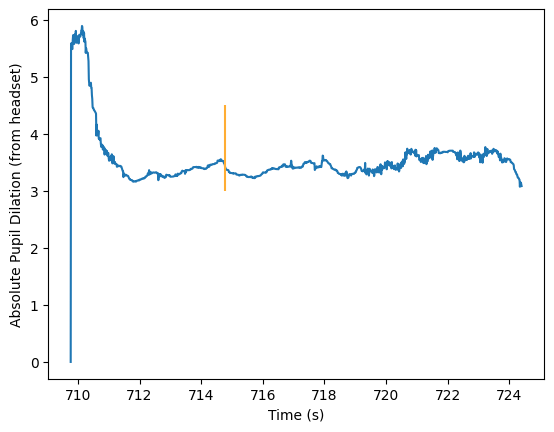

In [37]:
pid = 1
speed = 400

dfX = frame[frame.pid == pid][1:]
dfX = dfX[dfX.speed == speed]
dfX = dfX[dfX.phase == 'calibration']
dfX['Time'] = dfX.pid_sample * (1000 / 90) / 1000


# lst_values = np.reshape([dfX.pupilDilation_L], (len(dfX.pid_sample[1:]), 2))

fig, ax = plt.subplots()

ax.plot(dfX.Time, dfX.pupilDilation_L)
ax.vlines(dfX.Time.iloc[0] + 5, ymin=3, ymax=4.5, colors=colorDic['yellow']) # added to visualize cutoff where pupil response time would stabalize 
ax.set_xlabel('Time (s)')
ax.set_ylabel('Absolute Pupil Dilation (from headset)')



# for Speed in dfX.Speed.unique():
#     lst_values_L.append(float(dfX[dfX.Speed == Speed].pupilDilation_L))
        
# lst_ticks = df.Speed.unique()

In [8]:
dfX.pupilDilation_L[1:]

104356    5.479950
104357    5.428070
104358    5.392532
104359    5.384216
104360    5.384216
            ...   
105664    3.840332
105665    3.840225
105666    3.847839
105667    3.847290
105668    3.850098
Name: pupilDilation_L, Length: 1313, dtype: float64

In [9]:
import tqdm

In [40]:
## Remove the first 5 seconds at the start of each trial to allow for the pupil to stabalize

lst = []
for pid in tqdm.tqdm(sorted(frame.pid.unique())):
    for speed in sorted(frame.speed.unique()):
        for phase in sorted(frame.phase.unique()):
            dfX = frame[(frame.pid == pid) & (frame.speed == speed) & (frame.phase == phase)]
            dfX = dfX.iloc[450:]
            lst.append(dfX)

frame_X = pd.concat(lst)


100%|██████████| 19/19 [01:12<00:00,  3.81s/it]


In [41]:
frame_X

,pid,pid_sample,startPause,activeScene,textFile,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
450,0,450,15,NormalReading,NormalReading,0,calibration,3.414734,3.458069,-5.62,-5.22,90.00
451,0,451,15,NormalReading,NormalReading,0,calibration,3.406372,3.456223,-5.63,-5.22,90.00
452,0,452,15,NormalReading,NormalReading,0,calibration,3.414536,3.456039,-5.76,-5.26,90.00
453,0,453,15,NormalReading,NormalReading,0,calibration,3.414566,3.459290,-5.73,-5.30,90.00
454,0,454,15,NormalReading,NormalReading,0,calibration,3.417923,3.458984,-5.58,-5.32,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1749524,18,84465,15,RSVP,f,600,test,3.306305,3.365158,-1.54,1.11,60.00
1749525,18,84466,15,RSVP,f,600,test,3.315094,3.365005,-1.53,1.05,60.00
1749526,18,84467,15,RSVP,f,600,test,3.306091,3.365173,-1.50,1.02,60.00
1749527,18,84468,15,RSVP,f,600,test,3.315048,3.382355,-1.48,1.01,60.00


In [42]:
frame_X.to_csv('Data/Main-Study_1/merged_main_all.csv')

In [11]:
lst = []
for pid in tqdm.tqdm(sorted(frame_X.pid.unique())):
    for speed in sorted(frame_X.speed.unique()):
        for phase in sorted(frame_X.phase.unique()):
            dfX = frame_X[(frame_X.pid == pid) & (frame_X.speed == speed) & (frame_X.phase == phase)]
            lower = dfX.pupilDilation_L.mean() - dfX.pupilDilation_L.std() * 3
            upper = dfX.pupilDilation_L.mean() + dfX.pupilDilation_L.std() * 3
            dfY = dfX[(dfX.pupilDilation_L > lower) & (dfX.pupilDilation_L < upper)]
            lst.append([pid, speed, phase, dfY.pupilDilation_L.mean()])
frame_plotting = pd.DataFrame(lst)
frame_plotting.columns = ["PID", "Speed", 'Phase', "PupilDilation"]

  0%|          | 0/19 [00:00<?, ?it/s]100%|██████████| 19/19 [00:29<00:00,  1.53s/it]


In [12]:
#plotting = frame.groupby(['pid', 'speed', 'phase']).apply(lambda x: np.median(np.hstack(np.mean([x.pupilDilation_L, x.pupilDilation_R], axis=0))))
#frame_plotting = pd.DataFrame(plotting).reset_index()
#frame_plotting.columns = ["PID", "Speed", 'Phase', "PupilDilation"]

In [13]:
frame_plotting[frame_plotting.Phase == 'calibration']

,PID,Speed,Phase,PupilDilation
0,0,0,calibration,4.170504
3,0,200,calibration,4.006377
6,0,250,calibration,3.565228
9,0,300,calibration,3.764935
12,0,350,calibration,3.555739
...,...,...,...,...
555,18,400,calibration,3.264681
558,18,450,calibration,3.447491
561,18,500,calibration,3.476502
564,18,550,calibration,2.992235


In [14]:
frame_plotting.dtypes

PID                int32
Speed              int64
Phase             object
PupilDilation    float64
dtype: object

In [15]:
frame_plotting

,PID,Speed,Phase,PupilDilation
0,0,0,calibration,4.170504
1,0,0,finished,NaN
2,0,0,test,4.522814
3,0,200,calibration,4.006377
4,0,200,finished,NaN
...,...,...,...,...
565,18,550,finished,NaN
566,18,550,test,3.678868
567,18,600,calibration,3.450364
568,18,600,finished,NaN


c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


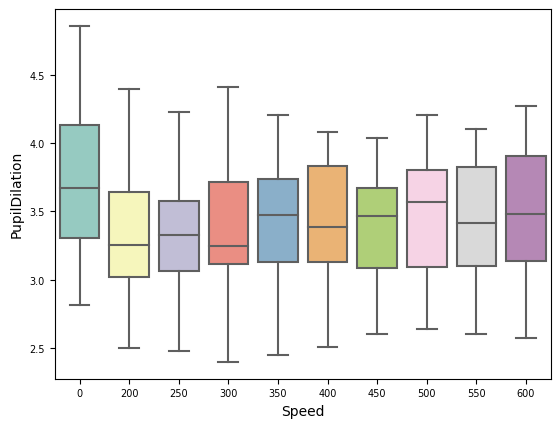

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.tick_params(axis='both', which='major', labelsize=7)
g = sns.boxplot(x="Speed", y="PupilDilation", data=frame_plotting.loc[frame_plotting['Phase'] == 'test'], palette="Set3")
# g.set_xticklabels(['Black', 'Gray', 'White'])
plt.show()

In [17]:
import pingouin as pg
res = pg.rm_anova(dv='PupilDilation', within=['Speed'], subject='PID', 
                  data=frame_plotting, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Speed,2.003858,9,0.222651,9.607043,1.098597e-11,0.000003,0.045282,0.446257,False,0.000732,8.412613e-07
1,Error,3.754479,162,0.023176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
post_hocs = pg.pairwise_tests(dv='PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=frame_plotting.loc[(frame_plotting['Phase'] == 'test')])
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,5.005369,18.0,two-sided,0.000092,0.004130,bonf,302.344,0.697293
1,Speed,0,250,True,True,6.211021,18.0,two-sided,0.000007,0.000330,bonf,2921.306,0.711208
2,Speed,0,300,True,True,6.196998,18.0,two-sided,0.000008,0.000340,bonf,2847.336,0.646893
3,Speed,0,350,True,True,4.961159,18.0,two-sided,0.000101,0.004545,bonf,277.66,0.571092
4,Speed,0,400,True,True,4.929173,18.0,two-sided,0.000108,0.004871,bonf,261.052,0.543666
5,Speed,0,450,True,True,4.880133,18.0,two-sided,0.000120,0.005419,bonf,237.473,0.629606
6,Speed,0,500,True,True,3.923947,18.0,two-sided,0.000995,0.044770,bonf,37.14,0.492170
7,Speed,0,550,True,True,3.724527,18.0,two-sided,0.001552,0.069819,bonf,25.282,0.507228
8,Speed,0,600,True,True,2.991689,18.0,two-sided,0.007826,0.352149,bonf,6.383,0.393535
9,Speed,200,250,True,True,-0.098421,18.0,two-sided,0.922685,1.000000,bonf,0.239,-0.005755


## Relative Data

In [44]:
frame_plotting

,PID,Speed,PupilDilation,rel_PupilDilation
0,0,0,4.522814,0.352311
1,0,200,4.395034,0.388657
2,0,250,4.228001,0.662774
3,0,300,3.915816,0.150880
4,0,350,3.710847,0.155108
...,...,...,...,...
185,18,400,3.385493,0.120812
186,18,450,3.529309,0.081818
187,18,500,3.581749,0.105247
188,18,550,3.678868,0.686633


In [45]:
dfZ = pd.DataFrame()
lst_df = []
lst_value = []
lst_baseline = []


for pid in frame_plotting.PID.unique():
    dfX = frame_plotting[frame_plotting['PID'] == pid]
    for speed in dfX.Speed.unique():
        dfY = dfX[dfX.Speed == speed]
        baseline = dfY[dfY.Phase == 'calibration'].reset_index()
        lst_baseline.append(baseline)
        value = dfY[dfY.Phase == 'test'].reset_index()
        lst_value.append(value)
        value['rel_PupilDilation'] = value.PupilDilation - baseline.PupilDilation
        lst_df.append(value)
        
df = pd.concat(lst_df)

AttributeError: 'DataFrame' object has no attribute 'Phase'

In [21]:
df

,index,PID,Speed,Phase,PupilDilation,rel_PupilDilation
0,2,0,0,test,4.522814,0.352311
0,5,0,200,test,4.395034,0.388657
0,8,0,250,test,4.228001,0.662774
0,11,0,300,test,3.915816,0.150880
0,14,0,350,test,3.710847,0.155108
...,...,...,...,...,...,...
0,557,18,400,test,3.385493,0.120812
0,560,18,450,test,3.529309,0.081818
0,563,18,500,test,3.581749,0.105247
0,566,18,550,test,3.678868,0.686633


In [22]:
df2.rel_PupilDilation.values[0]

NameError: name 'df2' is not defined

In [ ]:
df2.rel_PupilDilation.values

array([ 0.43856993,  0.17227614,  0.14342812,  0.19147091,  0.34195001,
       -0.09820343,  0.11122313,  0.00173358,  0.11119878, -0.04718413,
        0.03546745, -0.06049528,  0.04904292,  0.43906078, -0.09788081,
        0.22189124,  0.36985163,  0.14031206,  0.23592313])

In [ ]:
dfY

,index,Speed,Values
0,0,200,"[0.3886573791111996, 0.41066575370190517, 0.26..."
1,1,200,"[0.3886573791111996, 0.41066575370190517, 0.26..."
2,2,200,"[0.3886573791111996, 0.41066575370190517, 0.26..."
3,3,200,"[0.3886573791111996, 0.41066575370190517, 0.26..."
4,4,200,"[0.3886573791111996, 0.41066575370190517, 0.26..."
...,...,...,...
166,166,600,"[0.43856992638803405, 0.17227613600352054, 0.1..."
167,167,600,"[0.43856992638803405, 0.17227613600352054, 0.1..."
168,168,600,"[0.43856992638803405, 0.17227613600352054, 0.1..."
169,169,600,"[0.43856992638803405, 0.17227613600352054, 0.1..."


In [46]:
lstValues = []
lstFreqs = []
for f in sorted(df.Speed.values):
    df2 = df[df.Speed == f]
    lstValues.append(df2.rel_PupilDilation.values)
    lstFreqs.append(f)

dfX = pd.DataFrame([lstFreqs, lstValues]).swapaxes('index', 'columns')
dfX.columns = ['Speed', 'Values']
testX = dfX.groupby(['Speed']).apply(lambda x: np.hstack(x.Values))
dfY = pd.DataFrame(testX).reset_index()
dfY.columns = ['Speed', 'Values']
dfY['Speed'] = dfY['Speed'].astype(int)

dfY = dfY.sort_values('Speed', ascending=True)
lstTicks = dfY['Speed'].values
lstValues = dfY['Values'].values

C:\Users\jesse\AppData\Local\Temp\ipykernel_38192\2747782065.py:8: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  dfX = pd.DataFrame([lstFreqs, lstValues]).swapaxes('index', 'columns')


In [47]:
lstValues

array([array([ 0.35231082,  0.03842282,  0.19292061,  0.2913082 ,  0.37107058,
               0.03625003,  0.03521963, -0.15765266, -0.17418673,  0.39464285,
              -0.0388883 , -0.30464698,  0.10960096,  0.72041379,  0.08266171,
               0.18685704,  0.33395684, -0.59780389,  0.30318499,  0.35231082,
               0.03842282,  0.19292061,  0.2913082 ,  0.37107058,  0.03625003,
               0.03521963, -0.15765266, -0.17418673,  0.39464285, -0.0388883 ,
              -0.30464698,  0.10960096,  0.72041379,  0.08266171,  0.18685704,
               0.33395684, -0.59780389,  0.30318499,  0.35231082,  0.03842282,
               0.19292061,  0.2913082 ,  0.37107058,  0.03625003,  0.03521963,
              -0.15765266, -0.17418673,  0.39464285, -0.0388883 , -0.30464698,
               0.10960096,  0.72041379,  0.08266171,  0.18685704,  0.33395684,
              -0.59780389,  0.30318499,  0.35231082,  0.03842282,  0.19292061,
               0.2913082 ,  0.37107058,  0.03625003,

In [49]:
from sklearn.ensemble import HistGradientBoostingRegressor

X = df.rel_PupilDilation.values
y = df.Speed.values.reshape(-1, 1)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

reg = HistGradientBoostingRegressor(loss='absolute_error')
reg.fit(y_train, X_train)

y_pred = reg.predict(df.Speed.unique().reshape(-1, 1))

In [50]:
y_pred

array([0.10657801, 0.10657801, 0.09137119, 0.1482023 , 0.15623069,
       0.20457621, 0.21607978, 0.18058344, 0.13039489, 0.13039489])

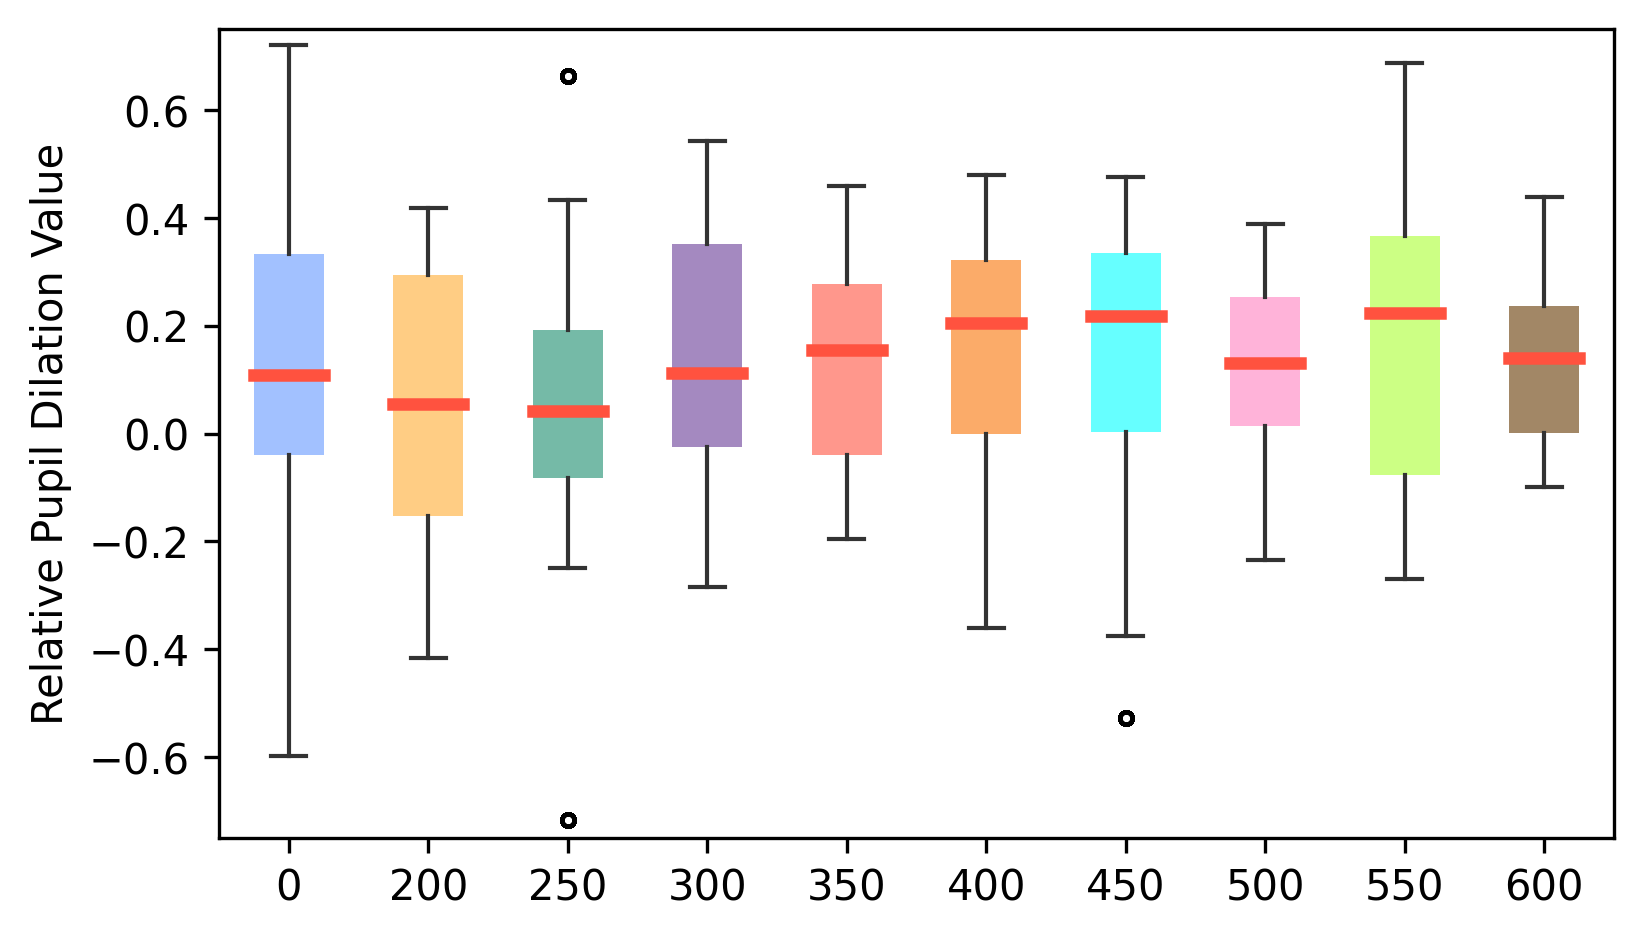

: 

In [57]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Relative Pupil Dilation Value')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
ax.set_ylim(-yMax,yMax)

plt.savefig('./figures/main_relPupil_overall.pdf')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

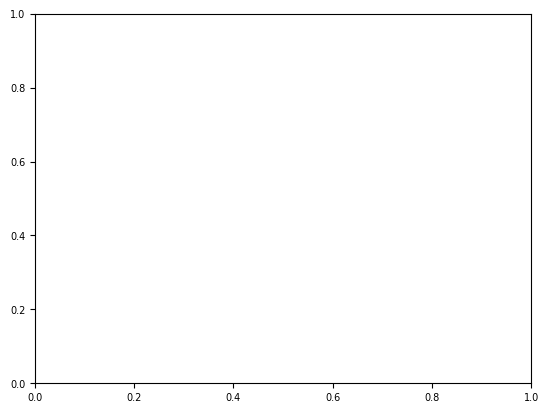

In [ ]:
plt.tick_params(axis='both', which='major', labelsize=7)
plt.boxplot(lstTicks, lstValues)
# g.set_xticklabels(['Black', 'Gray', 'White'])
plt.show()

In [ ]:
import pingouin as pg
res = pg.rm_anova(dv='rel_PupilDilation', within=['Speed'], subject='PID', 
                  data=df, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Speed,0.261105,9,0.029012,1.014446,0.430657,0.41713,0.024097,0.611201,False,0.01363,0.037203
1,Error,4.632965,162,0.028599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,index,PID,Speed,Phase,PupilDilation,rel_PupilDilation
0,2,0,0,test,4.522814,0.352311
0,5,0,200,test,4.395034,0.388657
0,8,0,250,test,4.228001,0.662774
0,11,0,300,test,3.915816,0.150880
0,14,0,350,test,3.710847,0.155108
...,...,...,...,...,...,...
0,557,18,400,test,3.385493,0.120812
0,560,18,450,test,3.529309,0.081818
0,563,18,500,test,3.581749,0.105247
0,566,18,550,test,3.678868,0.686633


In [ ]:
post_hocs = pg.pairwise_tests(dv='rel_PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=df)
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,0.951241,18.0,two-sided,0.354081,1.0,bonf,0.354,0.170974
1,Speed,0,250,True,True,0.893210,18.0,two-sided,0.383532,1.0,bonf,0.338,0.228828
2,Speed,0,300,True,True,-0.259942,18.0,two-sided,0.797858,1.0,bonf,0.245,-0.055953
3,Speed,0,350,True,True,-0.214872,18.0,two-sided,0.832283,1.0,bonf,0.243,-0.048027
4,Speed,0,400,True,True,-0.842778,18.0,two-sided,0.410412,1.0,bonf,0.325,-0.189902
5,Speed,0,450,True,True,-0.270387,18.0,two-sided,0.789939,1.0,bonf,0.245,-0.062703
6,Speed,0,500,True,True,-0.294149,18.0,two-sided,0.772009,1.0,bonf,0.247,-0.066586
7,Speed,0,550,True,True,-0.797496,18.0,two-sided,0.435558,1.0,bonf,0.315,-0.195032
8,Speed,0,600,True,True,-0.490198,18.0,two-sided,0.629916,1.0,bonf,0.265,-0.111847
9,Speed,200,250,True,True,0.320754,18.0,two-sided,0.752091,1.0,bonf,0.249,0.073524


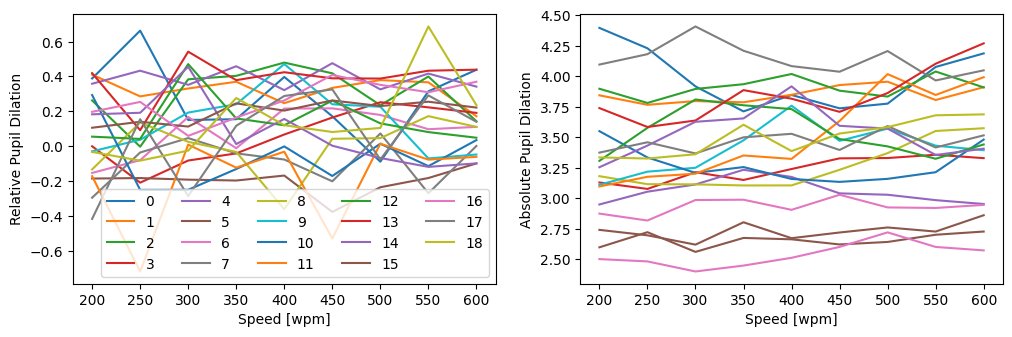

In [ ]:
df = df[df.Speed != 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))


for pid in df.PID.unique():
    dfX = df[df.PID == pid]
    ax1.plot(dfX.Speed, dfX.rel_PupilDilation, label=dfX.PID.unique()[0])
ax1.set_ylabel('Relative Pupil Dilation')
ax1.set_xlabel('Speed [wpm]')

ax1.legend(ncol=5)




for pid in df.PID.unique():
    dfX = df[df.PID == pid]
    ax2.plot(dfX.Speed, dfX.PupilDilation, label=dfX.PID.unique()[0])
ax2.set_ylabel('Absolute Pupil Dilation')
ax2.set_xlabel('Speed [wpm]')
plt.show()

In [ ]:
frame

,pid,pid_sample,startPause,activeScene,textFile,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
0,0,0,15,NormalReading,NormalReading,0,calibration,0.000000,0.000000,0.00,0.00,0.00
1,0,1,15,NormalReading,NormalReading,0,calibration,5.664001,5.236191,0.00,0.00,0.00
2,0,2,15,NormalReading,NormalReading,0,calibration,5.692337,5.436584,-9.45,0.97,90.00
3,0,3,15,NormalReading,NormalReading,0,calibration,5.714813,5.457336,-9.28,0.85,90.00
4,0,4,15,NormalReading,NormalReading,0,calibration,5.717087,5.474976,-9.52,0.85,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1756441,18,91592,15,RSVP,a,400,finished,3.354691,2.981583,0.05,-5.60,60.00
1756442,18,91593,15,RSVP,a,400,finished,3.264526,2.989426,-1.48,-5.52,60.00
1756443,18,91594,15,RSVP,a,400,finished,3.264526,2.963425,-1.00,-5.81,60.00
1756444,18,91595,15,RSVP,a,400,finished,3.264526,2.963425,-1.17,-6.39,60.00


In [24]:
lst = []
for pid in tqdm.tqdm(sorted(frame_X.pid.unique())):
    for speed in sorted(frame_X.speed.unique()):
        for phase in sorted(frame_X.phase.unique()):
            dfX = frame_X[(frame_X.pid == pid) & (frame_X.speed == speed) & (frame_X.phase == phase)]
            lower = dfX.pupilDilation_L.mean() - dfX.pupilDilation_L.std() *3
            upper = dfX.pupilDilation_L.mean() + dfX.pupilDilation_L.std() *3
            dfY = dfX[(dfX.pupilDilation_L > lower) & (dfX.pupilDilation_L < upper)]
            lst.append([pid, speed, phase, dfY.pupilDilation_L])
dfLong = pd.DataFrame(lst)
dfLong.columns = ["PID", "Speed", 'Phase', "PupilDilation"]

dfLong = dfLong.explode('PupilDilation')
dfLong = dfLong.reset_index()
dfLongTest = dfLong[(dfLong.Phase == 'test') & (dfLong.PID == 0)]

100%|██████████| 19/19 [00:29<00:00,  1.54s/it]


In [25]:
dfLong

,index,PID,Speed,Phase,PupilDilation
0,0,0,0,calibration,3.734238
1,0,0,0,calibration,3.691483
2,0,0,0,calibration,3.678223
3,0,0,0,calibration,3.668411
4,0,0,0,calibration,3.646698
...,...,...,...,...,...
1548659,569,18,600,test,3.536072
1548660,569,18,600,test,3.530182
1548661,569,18,600,test,3.527817
1548662,569,18,600,test,3.498962


In [23]:
dfLongTest['rel_PD'] = dfLongTest.PupilDilation - (dfLongTest.PupilDilation - dfLong[(dfLong.Phase == 'calibration') & (dfLong.PID == 0)].PupilDilation)
dfLongTest

NameError: name 'dfLongTest' is not defined

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

X = dfLongTest.rel_PupilDilation.values
y = df.Speed.values.reshape(-1, 1)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

reg = HistGradientBoostingRegressor(loss='absolute_error')
reg.fit(y_train, X_train)

y_pred = reg.predict(df.Speed.unique().reshape(-1, 1))

In [31]:
dflist = []

for pid in tqdm.tqdm(sorted(dfLong.PID.unique())):
    # print(pid)
    for speed in sorted(dfLong.Speed.unique()):
        dfX = dfLong[(dfLong.PID == pid) & (dfLong.Speed == speed)]
        baseline = dfX[dfX.Phase == 'calibration'].PupilDilation.mean()
        dfy = dfX[dfX.Phase == 'test']
        dfy['rel_PupilDilation'] = dfX[dfX.Phase == 'test'].PupilDilation - baseline
        dflist.append(dfy)
        # break
        
dfLongT = pd.concat(dflist)

  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\jesse\AppData\Local\Temp\ipykernel_38192\1201234801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['rel_PupilDilation'] = dfX[dfX.Phase == 'test'].PupilDilation - baseline
C:\Users\jesse\AppData\Local\Temp\ipykernel_38192\1201234801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['rel_PupilDilation'] = dfX[dfX.Phase == 'test'].PupilDilation - baseline
C:\Users\jesse\AppData\Local\Temp\ipykernel_38192\1201234801.py:9: SettingWithCopyWarning: 
A 

In [32]:
dfLong

,index,PID,Speed,Phase,PupilDilation
0,0,0,0,calibration,3.734238
1,0,0,0,calibration,3.691483
2,0,0,0,calibration,3.678223
3,0,0,0,calibration,3.668411
4,0,0,0,calibration,3.646698
...,...,...,...,...,...
1548659,569,18,600,test,3.536072
1548660,569,18,600,test,3.530182
1548661,569,18,600,test,3.527817
1548662,569,18,600,test,3.498962


In [33]:
dfLongT

,index,PID,Speed,Phase,PupilDilation,rel_PupilDilation
867,2,0,0,test,5.285858,1.115354
868,2,0,0,test,5.260681,1.090177
869,2,0,0,test,5.213867,1.043363
870,2,0,0,test,5.265381,1.094877
871,2,0,0,test,5.209259,1.038755
...,...,...,...,...,...,...
1548659,569,18,600,test,3.536072,0.085708
1548660,569,18,600,test,3.530182,0.079818
1548661,569,18,600,test,3.527817,0.077453
1548662,569,18,600,test,3.498962,0.048598


In [40]:
dfX

,index,PID,Speed,Phase,PupilDilation,rel_PupilDilation
867,2,0,0,test,5.285858,1.115354
868,2,0,0,test,5.260681,1.090177
869,2,0,0,test,5.213867,1.043363
870,2,0,0,test,5.265381,1.094877
871,2,0,0,test,5.209259,1.038755
...,...,...,...,...,...,...
3794,2,0,0,test,4.654068,0.483564
3795,2,0,0,test,4.636765,0.466261
3796,2,0,0,test,4.629929,0.459425
3797,2,0,0,test,4.439392,0.268888


In [41]:
lst = []
for pid in tqdm.tqdm(sorted(dfLongT.PID.unique())):
    for speed in sorted(dfLongT.Speed.unique()):
            dfX = dfLongT[(dfLongT.PID == pid) & (dfLongT.Speed == speed)]
            lst.append([pid, speed, dfX.PupilDilation.mean(), dfX.rel_PupilDilation.mean()])

frame_plotting = pd.DataFrame(lst)
frame_plotting.columns = ["PID", "Speed", "PupilDilation", 'rel_PupilDilation']

100%|██████████| 19/19 [00:00<00:00, 39.19it/s]


In [43]:
frame_plotting.to_csv('./Data/Main-Study_1/merged_main.csv')

In [29]:
lst = []
for pid in tqdm.tqdm(sorted(frame_X.pid.unique())):
    for speed in sorted(frame_X.speed.unique()):
        for phase in sorted(frame_X.phase.unique()):
            dfX = frame_X[(frame_X.pid == pid) & (frame_X.speed == speed) & (frame_X.phase == phase)]
            lower = dfX.pupilDilation_L.mean() - dfX.pupilDilation_L.std() * 3
            upper = dfX.pupilDilation_L.mean() + dfX.pupilDilation_L.std() * 3
            dfY = dfX[(dfX.pupilDilation_L > lower) & (dfX.pupilDilation_L < upper)]
            lst.append([pid, speed, phase, dfY.pupilDilation_L.mean()])

frame_plotting = pd.DataFrame(lst)
frame_plotting.columns = ["PID", "Speed", 'Phase', "PupilDilation"]

100%|██████████| 19/19 [00:29<00:00,  1.53s/it]


In [30]:
frame_plotting

,PID,Speed,Phase,PupilDilation
0,0,0,calibration,4.170504
1,0,0,finished,NaN
2,0,0,test,4.522814
3,0,200,calibration,4.006377
4,0,200,finished,NaN
...,...,...,...,...
565,18,550,finished,NaN
566,18,550,test,3.678868
567,18,600,calibration,3.450364
568,18,600,finished,NaN
